Starting simulation at t=51. ms for a duration of 95. ms
95. ms (100%) simulated in < 1s


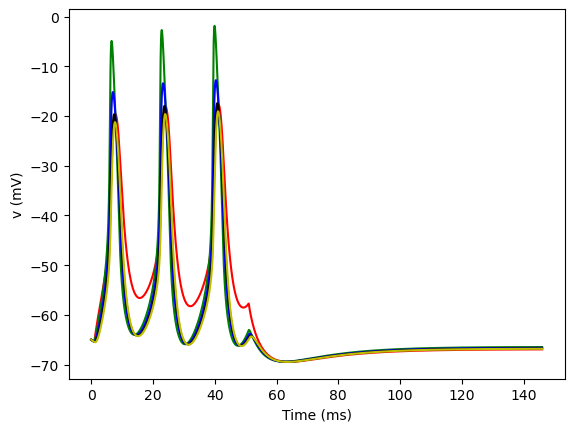

In [1]:
from brian2 import *
#Early signals detection 
#https://github.com/BeatrizArellano/regimeshifts/blob/main/README.md
defaultclock.dt = 0.025*ms

# Morphology
morpho = Soma(30*um)
morpho.axon = Cylinder(diameter=1*um, length=300*um, n=100)

# Channels
gL = 1e-4*siemens/cm**2
EL = -70*mV
ENa = 50*mV
ka = 6*mV
ki = 6*mV
va = -30*mV
vi = -50*mV
EK = -90*mV
vk = -20*mV
kk = 8*mV
eqs = '''
Im = gL*(EL-v)+gNa*m*h*(ENa-v)+gK*n*(EK-v) : amp/meter**2
dm/dt = (minf-m)/(0.3*ms) : 1 # simplified Na channel
dh/dt = (hinf-h)/(3*ms) : 1 # inactivation
dn/dt = (ninf-n)/(5*ms) : 1 # K+
minf = 1/(1+exp((va-v)/ka)) : 1
hinf = 1/(1+exp((v-vi)/ki)) : 1
ninf = 1/(1+exp((vk-v)/kk)) : 1
I : amp (point current)
gNa : siemens/meter**2
gK : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs,
                       Cm=1*uF/cm**2, Ri=100*ohm*cm, method='exponential_euler')
neuron.v = -65*mV
neuron.I = 0*amp
neuron.axon[30*um:60*um].gNa = 700*gL
neuron.axon[30*um:60*um].gK = 700*gL

# Monitors
mon=StateMonitor(neuron, 'v', record=True)

run(1*ms)
neuron.main.I = 0.15*nA
run(50*ms)
neuron.I = 0*amp
run(95*ms, report='text')

plot(mon.t/ms, mon.v[0]/mV, 'r')
plot(mon.t/ms, mon.v[20]/mV, 'g')
plot(mon.t/ms, mon.v[40]/mV, 'b')
plot(mon.t/ms, mon.v[60]/mV, 'k')
plot(mon.t/ms, mon.v[80]/mV, 'y')
xlabel('Time (ms)')
ylabel('v (mV)')
show()